In [1]:
from cobaya.model import get_model
from cobaya.run import run
import matplotlib.pyplot as plt
from getdist.mcsamples import MCSamplesFromCobaya
import getdist.plots as gdplt

info = {
    'params': {
        'beta': 1,
        'x': { 'prior': { 'dist': 'uniform', 'min': -1., 'max': 1.}}
    },
    'likelihood': {'GND': {'python_path': 'likelihoods/GND', 'output_params': ['pdf']}},
    'sampler': { 'mcmc': { 'max_tries': 1000 } }
}

samples = []
for i in range(1,5):
    info['params']['beta'] = i
    res, mcmc = run(info)
    samp = MCSamplesFromCobaya(res, mcmc.products()['sample'], r"\beta = %i"%i)
    samp.fine_bins_2D=1024
    samples.append(samp)

[root] *WARNING* auto bandwidth for pdf very small or failed (h=0.0006551774882613441,N_eff=460.0156402737048). Using fallback (h=0.01573613255801583)
[root] *WARNING* auto bandwidth for pdf very small or failed (h=0.00041326996979562723,N_eff=263.69310202395707). Using fallback (h=0.004453323941284508)


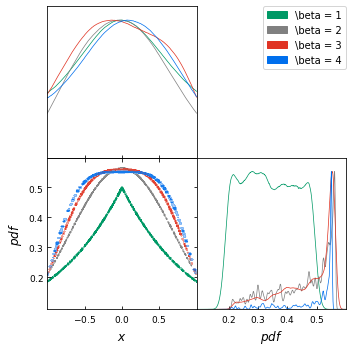

In [2]:
%matplotlib inline

gdplot = gdplt.get_subplot_plotter(width_inch=5)
gdplot.triangle_plot(samples, ["x", "pdf"], filled=True)